In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

labels = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt", header=None, sep="\s+")

X_train = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", header=None, sep="\s+")
y_train = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/Y_train.txt", header=None)

X_test_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt", header=None, sep="\s+")
y_test_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", header=None)

X_test = X_test_val[0:round(0.9*X_test_val.shape[0])]
X_val = X_test_val[round(0.9*X_test_val.shape[0]):]
y_test = y_test_val[0:round(0.9*y_test_val.shape[0])]
y_val = y_test_val[round(0.9*y_test_val.shape[0]):]

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
y_train = to_categorical(y_train)

X_val = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

labels.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6, 2), (7352, 1, 561), (7352, 7), (2652, 1, 561), (2652, 7))

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GRU, BatchNormalization, Dense, LSTM
import keras

modelo = Sequential()
modelo.add(GRU(128))
modelo.add(BatchNormalization())
modelo.add(Dense(7, activation="softmax"))

modelo.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=["accuracy", keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.F1Score()])

In [3]:
historico = modelo.fit(X_train, y_train, batch_size=10, epochs=20, validation_data=(X_val, y_val))
modelo.save("ModeloGruLSTM.keras")

Epoch 1/20


736/736 [==============================] - 6s 4ms/step - loss: 0.1561 - accuracy: 0.9072 - precision: 0.9266 - recall: 0.8780 - f1_score: 0.7785 - val_loss: 0.2632 - val_accuracy: 0.8136 - val_precision: 0.8179 - val_recall: 0.8068 - val_f1_score: 0.6309
Epoch 2/20
736/736 [==============================] - 2s 3ms/step - loss: 0.0508 - accuracy: 0.9501 - precision: 0.9517 - recall: 0.9480 - f1_score: 0.8157 - val_loss: 0.0907 - val_accuracy: 0.9492 - val_precision: 0.9552 - val_recall: 0.9390 - val_f1_score: 0.8103
Epoch 3/20
736/736 [==============================] - 3s 3ms/step - loss: 0.0412 - accuracy: 0.9592 - precision: 0.9607 - recall: 0.9582 - f1_score: 0.8236 - val_loss: 0.0240 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - val_f1_score: 0.8571
Epoch 4/20
736/736 [==============================] - 3s 4ms/step - loss: 0.0403 - accuracy: 0.9603 - precision: 0.9612 - recall: 0.9596 - f1_score: 0.8246 - val_loss: 0.0734 - val_accuracy: 0.9017 - 

In [9]:
_, precisao, precision, recall, f1_score = modelo.evaluate(X_test, y_test)
print(f"Precisão do modelo: {precisao*100} %")
print(f"Precision do modelo: {precision*100} %")
print(f"Recall do modelo: {recall*100} %")
print(f"F1-Score do modelo: {f1_score[-1]*100} %")

83/83 [==============================] - 0s 2ms/step - loss: 0.0975 - accuracy: 0.9129 - precision: 0.9138 - recall: 0.9114 - f1_score: 0.7831
Precisão do modelo: 91.2895917892456 %
Precision do modelo: 91.37996435165405 %
Recall do modelo: 91.13876223564148 %
F1-Score do modelo: 99.58847761154175 %


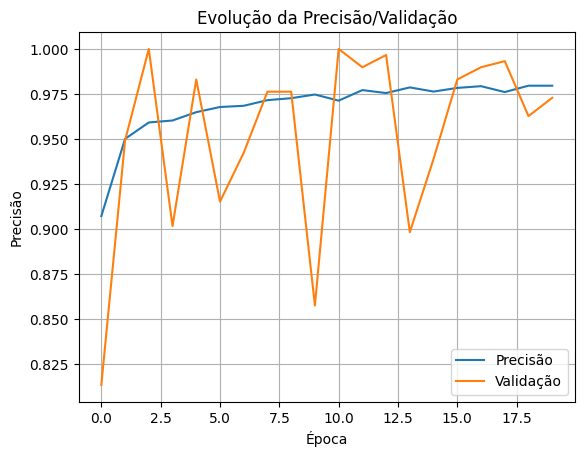

In [10]:
import matplotlib.pyplot as plt

accuracy = historico.history["accuracy"]
val_accuracy = historico.history["val_accuracy"]

plt.plot(accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.title("Evolução da Precisão/Validação")
plt.xlabel("Época")
plt.ylabel("Precisão")
plt.legend(["Precisão", "Validação"])
plt.savefig("Evolução Precisão Validação GruLSTM", bbox_inches="tight")

83/83 [==============================] - 0s 1ms/step


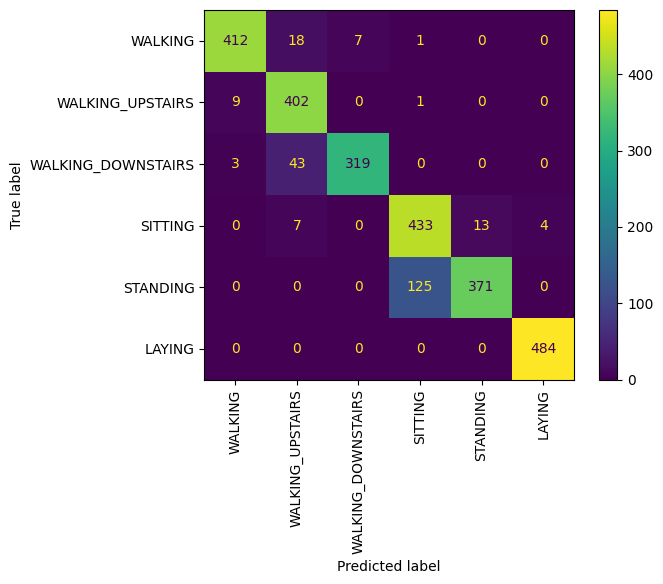

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_previsto = [np.argmax(y) for y in modelo.predict(X_test)]

cm = confusion_matrix(y_test, y_previsto)
display = ConfusionMatrixDisplay(cm, display_labels=labels[1])
display.plot(xticks_rotation="vertical")
display.figure_.savefig("Matriz de Confusão GruLSTM", bbox_inches="tight")